In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# read the data from the excel files
# the movies file was found to have two movies that did not have unique movieid's
#  the ratings file was checked to see if these "extra" movieId's were included and they were
# therefore, it was assumed that the movieId's for these two ratings were entered incorrectly
# and both files were updated to reflect a unique movieId for the associated ratings
ratings = pd.read_table('ml-latest-small/ratings_updated.csv', sep=',')
movies = pd.read_table('ml-latest-small/movies_updated.csv',sep=',')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# explore the ratings dataframe
ratings.count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
dtype: int64

In [5]:
ratings.isnull().values.any()

False

In [6]:
ratings.movieId.nunique()

9064

In [7]:
# explore the movies dataframe
movies.count()

movieId    9123
title      9123
genres     9123
dtype: int64

In [8]:
movies.isnull().values.any()

False

In [9]:
movies.movieId.nunique()

9123

In [10]:
movies.title.nunique()

9123

In [11]:
# add movie title data to ratings data
# join the dataframes on column 'movieId'
df = pd.merge(ratings, movies, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [12]:
# check to make sure the resultant database is what is expected and desired

In [13]:
df.count()

userId       100004
movieId      100004
rating       100004
timestamp    100004
title        100004
genres       100004
dtype: int64

In [14]:
df.title.nunique()

9064

In [15]:
df.movieId.nunique()

9064

In [16]:
df.userId.nunique()

671

In [17]:
df.isnull().values.any()

False

In [18]:
# find the number of ratings per each rating value
df.rating.value_counts().sort_index()

0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: rating, dtype: int64

In [19]:
# store it in numratings and then plot
numratings = df.rating.value_counts().sort_index()

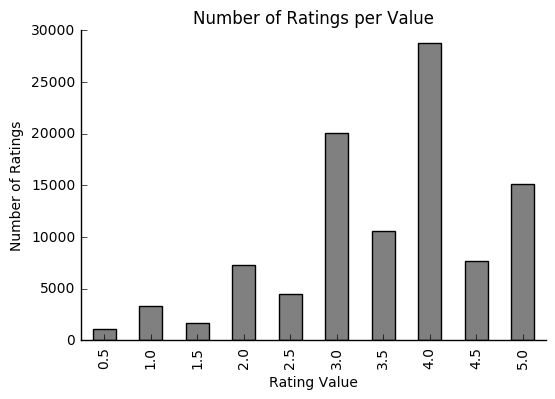

In [20]:
#  create a bar graph of the result
plt.figure()
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.xlabel('Rating Value')
plt.ylabel('Number of Ratings')
numratings.plot(kind='bar', color='grey')
plt.title('Number of Ratings per Value')
plt.show()

In [21]:
# find the number of  movies rated by each user
df.groupby('userId').size()

userId
1        20
2        76
3        51
4       204
5       100
6        44
7        88
8       116
9        45
10       46
11       38
12       61
13       53
14       20
15     1700
16       29
17      363
18       51
19      423
20       98
21      162
22      220
23      726
24       21
25       26
26      172
27       23
28       50
29       22
30     1011
       ... 
642      36
643      24
644      39
645      30
646     169
647     150
648     256
649      90
650      29
651      20
652     267
653      51
654     626
655     105
656     128
657      20
658      60
659     142
660      92
661      33
662      58
663      26
664     519
665     434
666      40
667      68
668      20
669      37
670      31
671     115
dtype: int64

In [22]:
#  save it so we can plot it
ratingsperuser = df.groupby('userId').size()

In [23]:
#  What is the largest number of movies rated by a user?
ratingsperuser.max()

2391

In [24]:
#  What is the smallest number of movies rated by a user?
ratingsperuser.min()

20

In [25]:
# what is the average number of movies rated by a user?
ratingsperuser.mean()

149.03725782414307

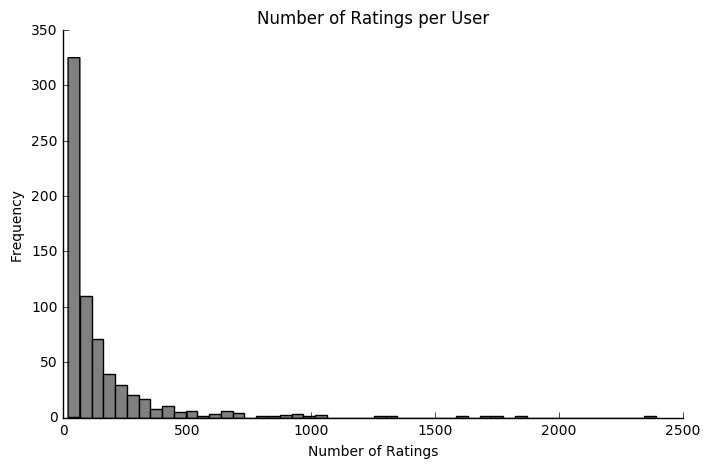

In [26]:
# create a histogram of the number of movies rated by a user

plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
ratingsperuser.plot.hist(bins=50,color='grey')
plt.xlabel('Number of Ratings')
plt.title('Number of Ratings per User')
plt.show()

In [27]:
# for reference, review df
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [28]:
# what is the average rating assigned by a user?
udf = df[['userId','rating']].groupby('userId').mean()

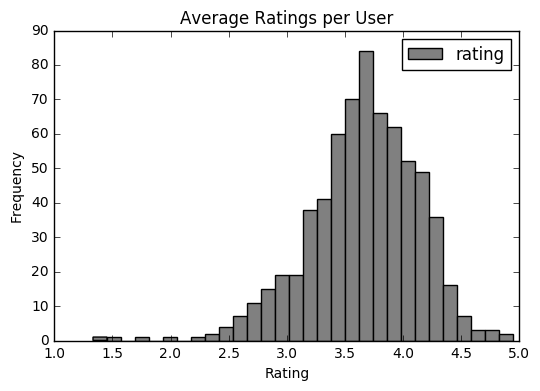

In [29]:
# create a histogram of the average rating assigned by a user and see if it is a normal distribution
plt.figure()
#ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
udf.plot.hist(bins=30,color='grey')
plt.xlabel('Rating')
plt.title('Average Ratings per User')
plt.show()

In [30]:
# we want to know what the average rating of each movie was and how many ratings each movie received
# create a dataframe called mdf that contains the movieId and rating
mdf = df[['movieId','rating']]

In [31]:
ratingspermovie = mdf.groupby('movieId').size()

In [32]:
ratingspermovie.head()

movieId
1    247
2    107
3     59
4     13
5     56
dtype: int64

In [33]:
ratingspermovie.min()

1

In [34]:
ratingspermovie.max()

341

In [35]:
ratingspermovie.mean()

11.033097969991173

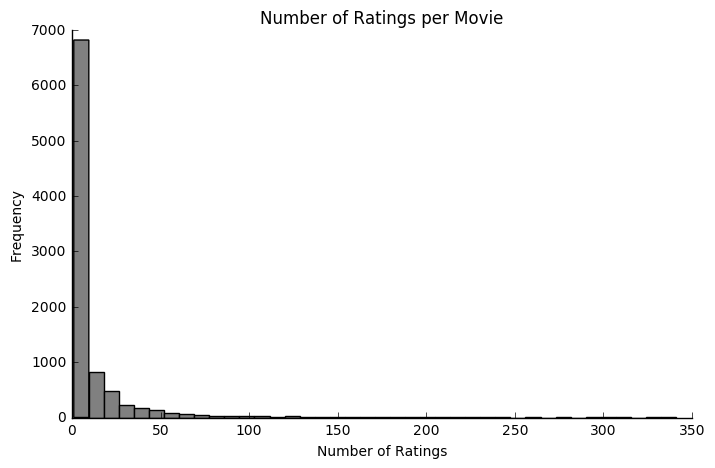

In [36]:
# create a histogram of the number of ratings per movie

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
ratingspermovie.plot.hist(bins=40,color='grey')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.show()

In [37]:
# how many ratings of each value did each movie receive?
df.groupby(['movieId','rating']).size()

movieId  rating
1        1.0        4
         1.5        3
         2.0       13
         2.5        4
         3.0       41
         3.5       23
         4.0       77
         4.5       19
         5.0       63
2        1.5        1
         2.0       12
         2.5        6
         3.0       37
         3.5       10
         4.0       27
         4.5        1
         5.0       13
3        0.5        1
         1.0        3
         1.5        2
         2.0        9
         2.5        2
         3.0       18
         3.5        2
         4.0       13
         4.5        2
         5.0        7
4        1.0        3
         1.5        1
         2.0        1
                   ..
159093   1.0        1
         3.0        1
159462   3.0        1
159690   2.0        1
159755   1.0        1
159858   3.5        1
         4.0        1
159972   0.5        1
160080   1.0        1
160271   2.5        1
160438   4.0        1
         4.5        1
160440   1.5        1
160563   1.0    

In [38]:
# what was the average rating each movie received?
mdf.groupby('movieId').mean()

,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857
6,3.884615
7,3.283019
8,3.800000
9,3.150000


In [39]:
avgratingpermovie = mdf.groupby('movieId').mean()

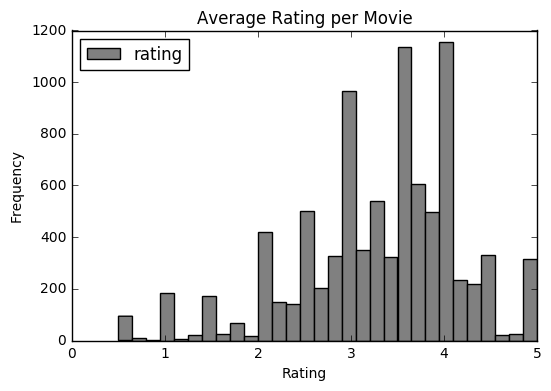

In [40]:
# create a histogram of the average rating per movie

plt.figure()
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
avgratingpermovie.plot.hist(bins=30,color='grey')
plt.xlabel('Rating')
plt.title('Average Rating per Movie')
plt.show()

In [41]:
# which movie received the most ratings of 5.0?
mostfives = df[df.rating == 5.0]

In [42]:
# the top 10 most highly rated films
mostfives.groupby('title').size().sort_values().tail(10)

title
Star Wars: Episode V - The Empire Strikes Back (1980)     94
Matrix, The (1999)                                        95
Fargo (1996)                                             100
Silence of the Lambs, The (1991)                         100
Forrest Gump (1994)                                      102
Godfather, The (1972)                                    107
Schindler's List (1993)                                  109
Star Wars: Episode IV - A New Hope (1977)                122
Pulp Fiction (1994)                                      138
Shawshank Redemption, The (1994)                         170
dtype: int64

In [43]:
# which movie received the most ratings of 0.5?
mostpointfives = df[df.rating == 0.5]

In [44]:
# the bottom 10 movies
mostpointfives.groupby('title').size().sort_values().tail(10)

title
Lord of the Rings: The Fellowship of the Ring, The (2001)    4
Waterworld (1995)                                            4
Blair Witch Project, The (1999)                              4
Armageddon (1998)                                            4
Battlefield Earth (2000)                                     4
Batman & Robin (1997)                                        4
Scary Movie (2000)                                           5
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)         5
Titanic (1997)                                               5
Star Wars: Episode II - Attack of the Clones (2002)          7
dtype: int64